In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
aww = pd.read_csv('data/aww_posts.csv', index_col=0)
braincels = pd.read_csv('data/braincels_posts.csv', index_col=0)
earthporn = pd.read_csv('data/earthporn_posts.csv', index_col=0)
incels = pd.read_csv('data/incels_posts.csv', index_col=0)

 Wzięliśmy posty wraz z komentarzami z czterech subredditów (10000 z każdego subreddita), dwóch o kontrowersyjenej tematyce (braincels, incels) oraz dwóch o niekontrowersyjnej tematyce (earthporn,aww). Dla każdego postu wyliczyliśmy wartości t.j. liczba komentarzy, głębokość drzewa postu, czy index wienera. Dodatkowo dokonaliśmy analizy treści postu i wyznaczyliśmy sentyment treści oraz tytułu.

### Porównanie rozmiaru drzew

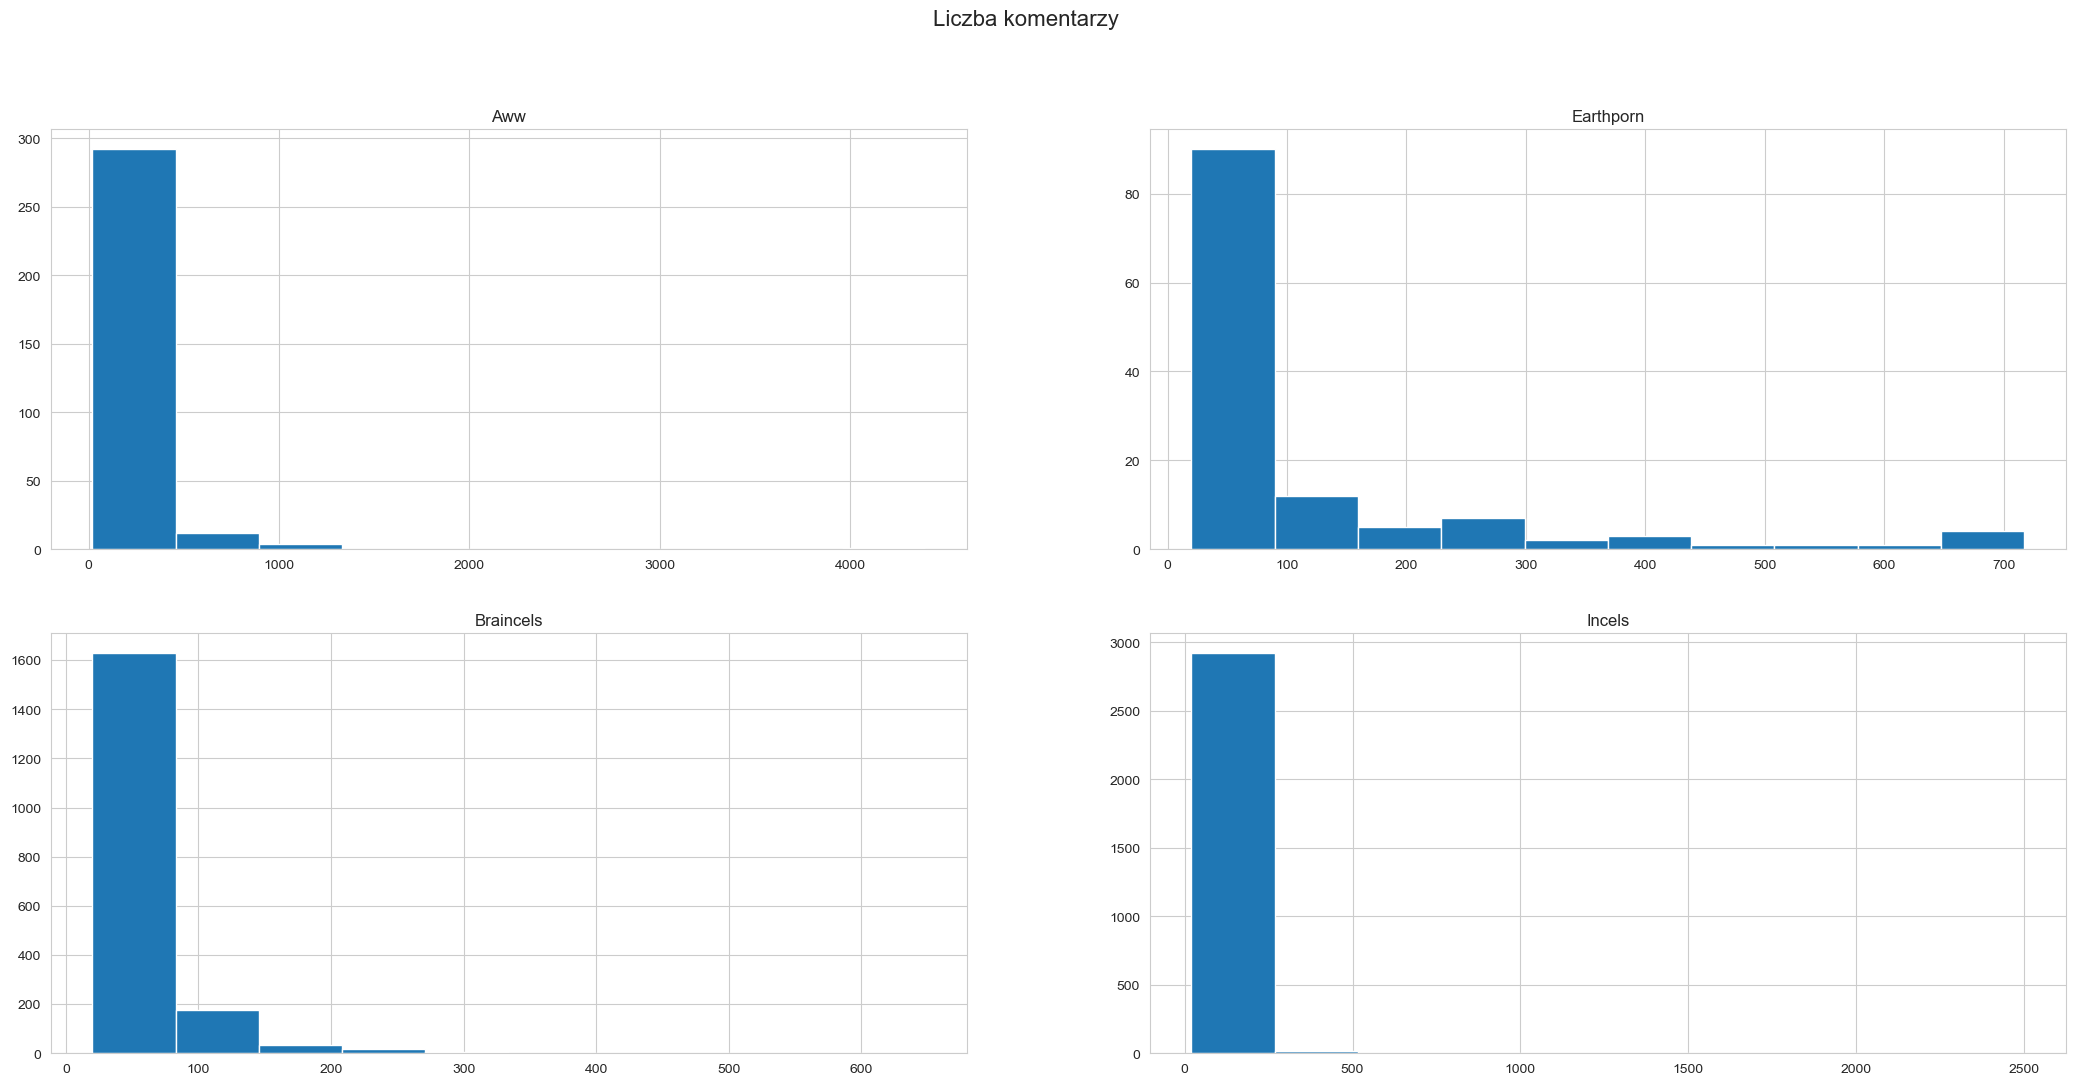

In [5]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(26, 12))
fig.suptitle("Liczba komentarzy", fontsize=16)
ax = plt.subplot(221)
ax.set_title("Aww")
plt.hist(aww[aww['no_comments']>=20]['no_comments'])

ax = plt.subplot(222)
ax.set_title("Earthporn")
plt.hist(earthporn[earthporn['no_comments']>=20]['no_comments'])

ax = plt.subplot(223)
ax.set_title("Braincels")
plt.hist(braincels[braincels['no_comments']>=20]['no_comments'])


ax = plt.subplot(224)
ax.set_title("Incels")
plt.hist(incels[incels['no_comments']>=20]['no_comments'])

plt.show()

In [6]:
print('Aww')
print(f"Mniej niż 20 komentarzy: {len(aww[aww['no_comments']<20])}")
print(f"Więcej niż 500 komentarzy: {len(aww[aww['no_comments']>500])}")
print('-----------------------------------------------------')
print('Earthporn')
print(f"Mniej niż 20 komentarzy: {len(earthporn[earthporn['no_comments']<20])}")
print(f"Więcej niż 500 komentarzy: {len(earthporn[earthporn['no_comments']>500])}")
print('-----------------------------------------------------')
print('Braincels')
print(f"Mniej niż 20 komentarzy: {len(braincels[braincels['no_comments']<20])}")
print(f"Więcej niż 1000 komentarzy: {len(braincels[braincels['no_comments']>500])}")
print('-----------------------------------------------------')
print('Incels')
print(f"Mniej niż 20 komentarzy: {len(incels[incels['no_comments']<20])}")
print(f"Więcej niż 500 komentarzy: {len(incels[incels['no_comments']>500])}")

Aww
Mniej niż 20 komentarzy: 9691
Więcej niż 500 komentarzy: 15
-----------------------------------------------------
Earthporn
Mniej niż 20 komentarzy: 9874
Więcej niż 500 komentarzy: 6
-----------------------------------------------------
Braincels
Mniej niż 20 komentarzy: 8137
Więcej niż 1000 komentarzy: 1
-----------------------------------------------------
Incels
Mniej niż 20 komentarzy: 7057
Więcej niż 500 komentarzy: 6


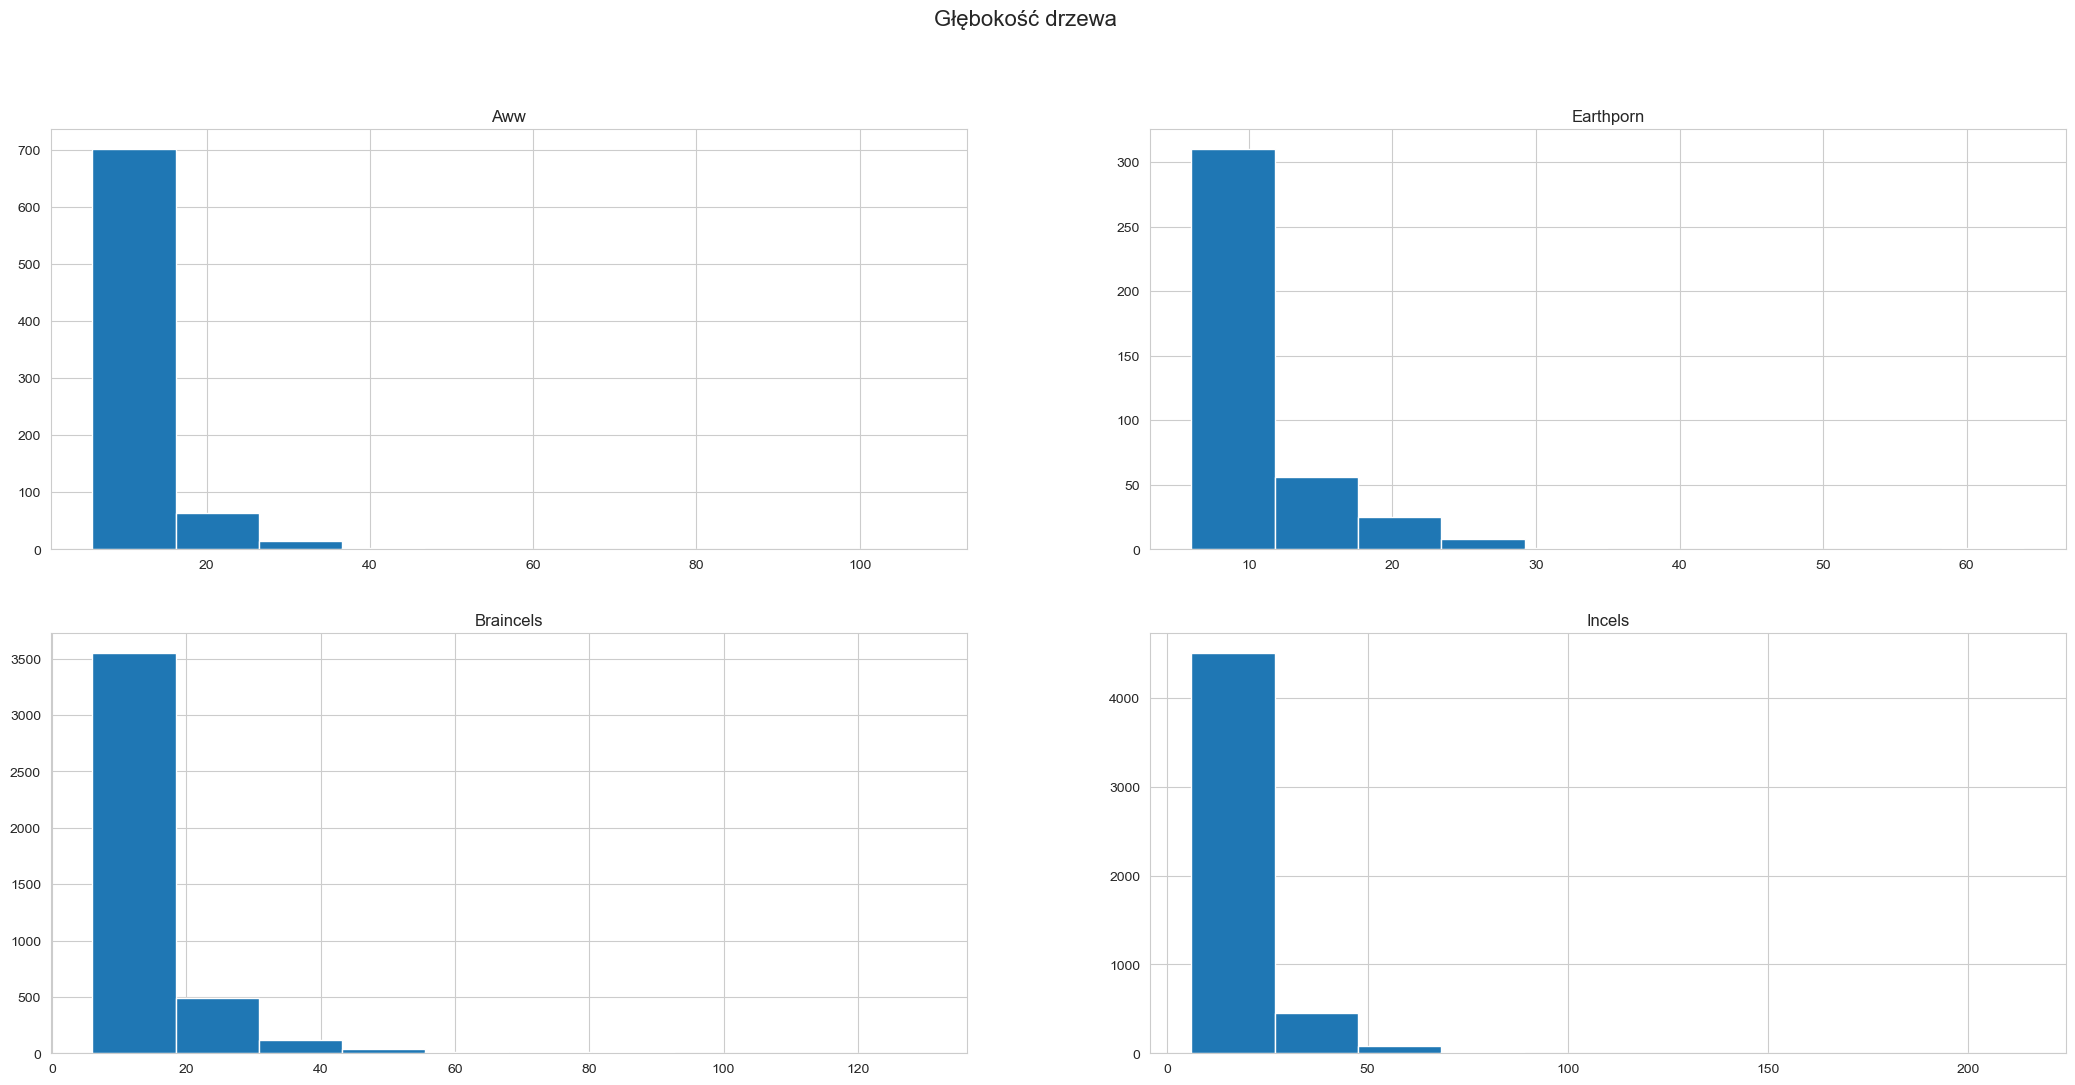

In [7]:
fig = plt.figure(figsize=(26, 12))
fig.suptitle("Głębokość drzewa", fontsize=16)
ax = plt.subplot(221)
ax.set_title("Aww")
plt.hist(aww[aww['depth']>=5]['depth'])

ax = plt.subplot(222)
ax.set_title("Earthporn")
plt.hist(earthporn[earthporn['depth']>=5]['depth'])

ax = plt.subplot(223)
ax.set_title("Braincels")
plt.hist(braincels[braincels['depth']>=5]['depth'])

ax = plt.subplot(224)
ax.set_title("Incels")
plt.hist(incels[incels['depth']>=5]['depth'])

plt.show()

In [8]:
print('Aww')
print(f"Płytsze niż 5: {len(aww[aww['depth']<5])}")
print(f"Głębsze niż 50: {len(aww[aww['depth']>50])}")
print('-----------------------------------------------------')
print('Earthporn')
print(f"Płytsze niż 5: {len(earthporn[earthporn['depth']<5])}")
print(f"Głębsze niż 50: {len(earthporn[earthporn['depth']>50])}")
print('-----------------------------------------------------')
print('Braincels')
print(f"Płytsze niż 5: {len(braincels[braincels['depth']<5])}")
print(f"Głębsze niż 50: {len(braincels[braincels['depth']>50])}")
print('-----------------------------------------------------')
print('Incels')
print(f"Płytsze niż 5: {len(incels[incels['depth']<5])}")
print(f"Głębsze niż 50: {len(incels[incels['depth']>50])}")

Aww
Płytsze niż 5: 9218
Głębsze niż 50: 1
-----------------------------------------------------
Earthporn
Płytsze niż 5: 9599
Głębsze niż 50: 1
-----------------------------------------------------
Braincels
Płytsze niż 5: 5770
Głębsze niż 50: 41
-----------------------------------------------------
Incels
Płytsze niż 5: 4938
Głębsze niż 50: 86


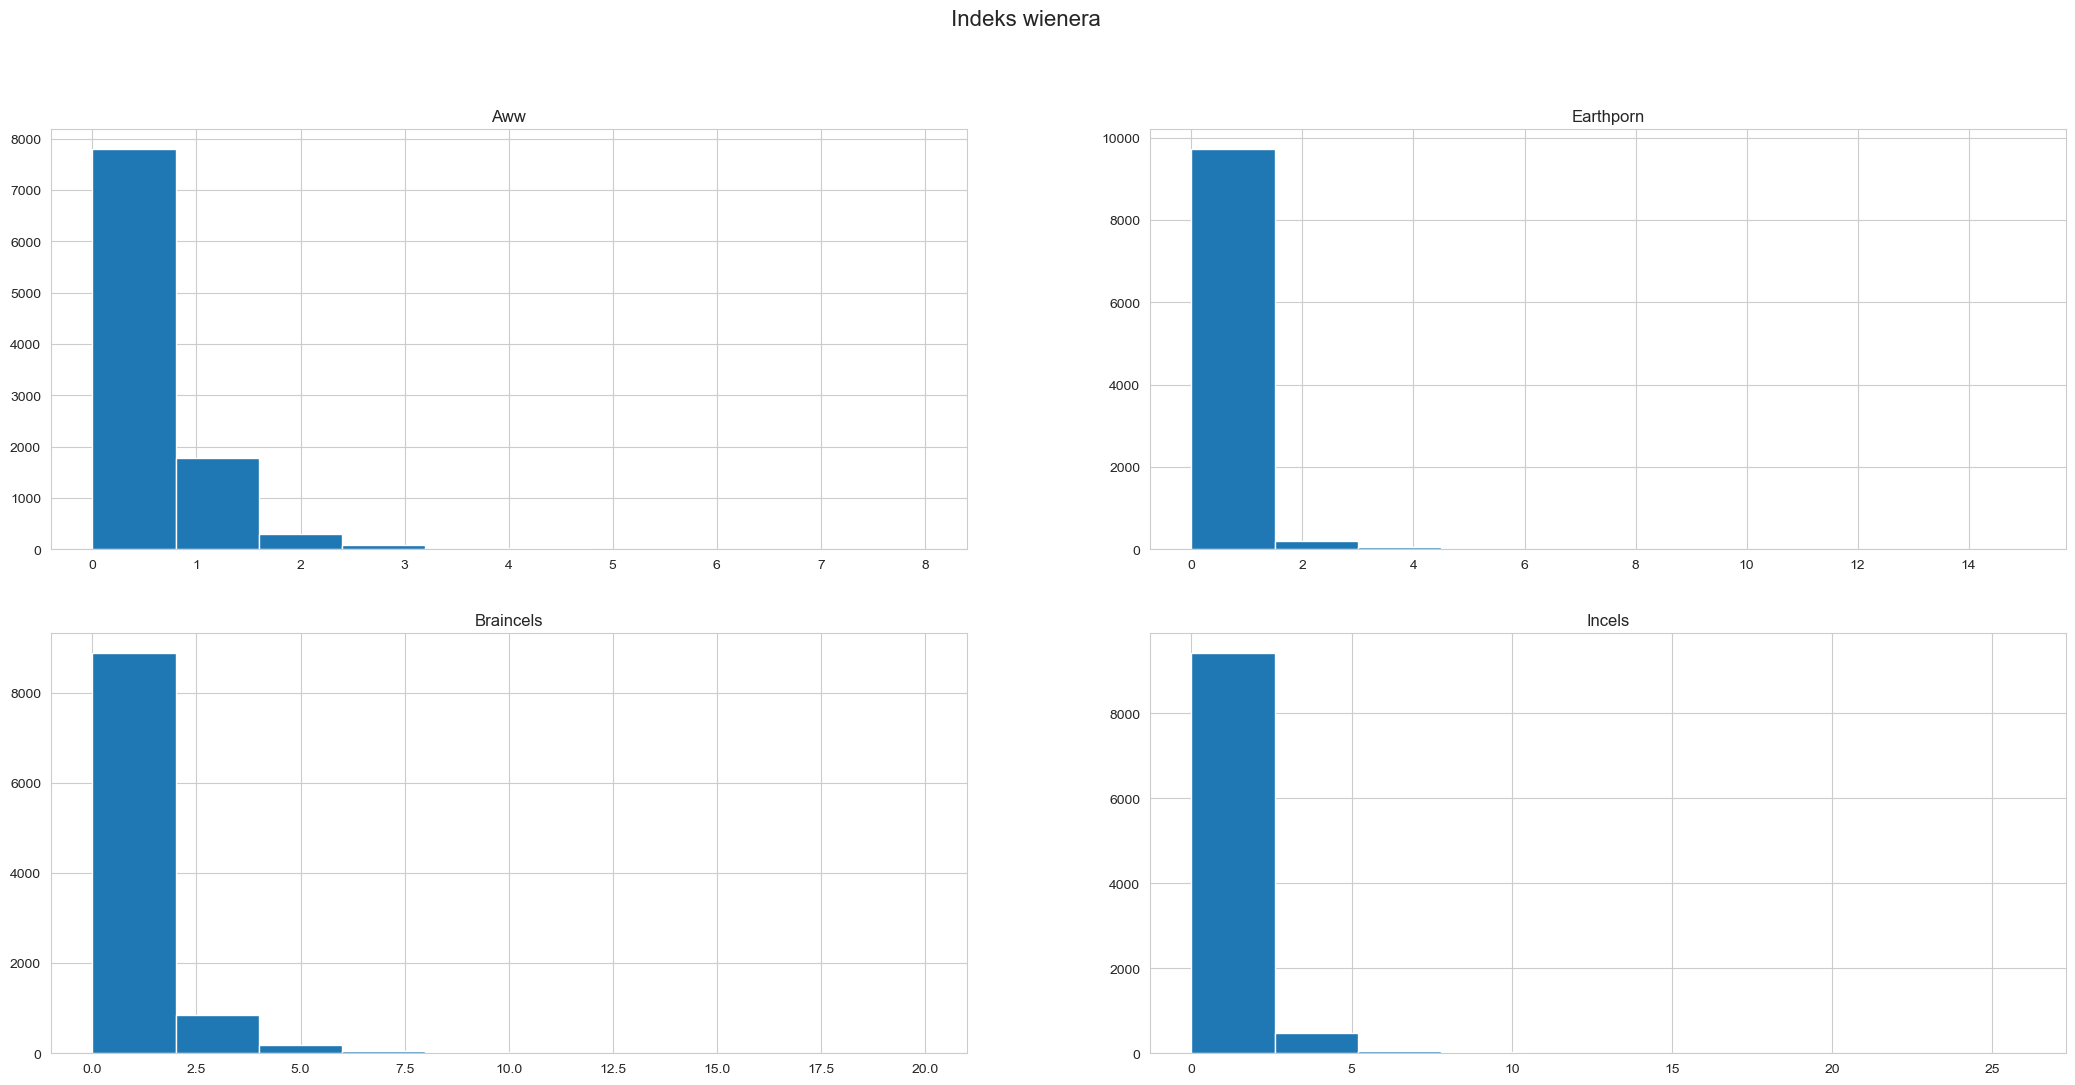

In [9]:
fig = plt.figure(figsize=(26, 12))
fig.suptitle("Indeks wienera", fontsize=16)
ax = plt.subplot(221)
ax.set_title("Aww")
plt.hist(aww['wiener_index'])

ax = plt.subplot(222)
ax.set_title("Earthporn")
plt.hist(earthporn['wiener_index'])

ax = plt.subplot(223)
ax.set_title("Braincels")
plt.hist(braincels['wiener_index'])

ax = plt.subplot(224)
ax.set_title("Incels")
plt.hist(incels['wiener_index'])

plt.show()

### Porównanie up/down

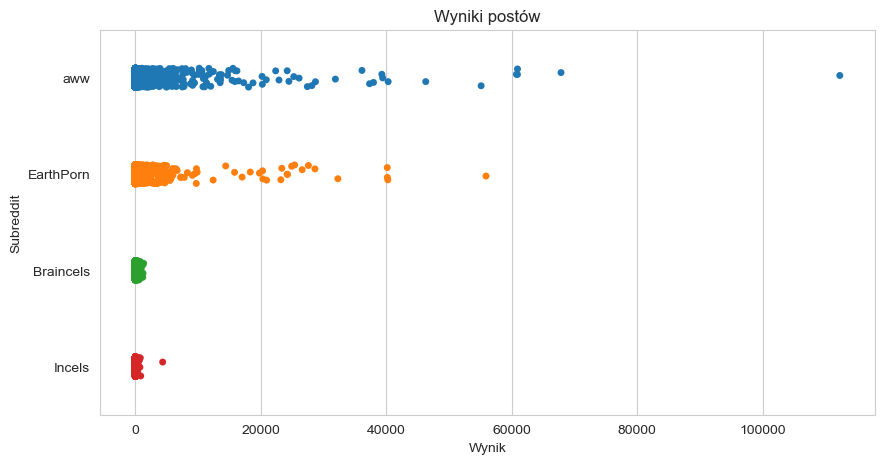

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
data = pd.concat((aww,earthporn,braincels,incels))
sns.stripplot(data=data, x="score", y="subreddit",ax=ax).set(title='Wyniki postów')
ax.set(xlabel='Wynik', ylabel='Subreddit')
plt.show()

### Czas trwania

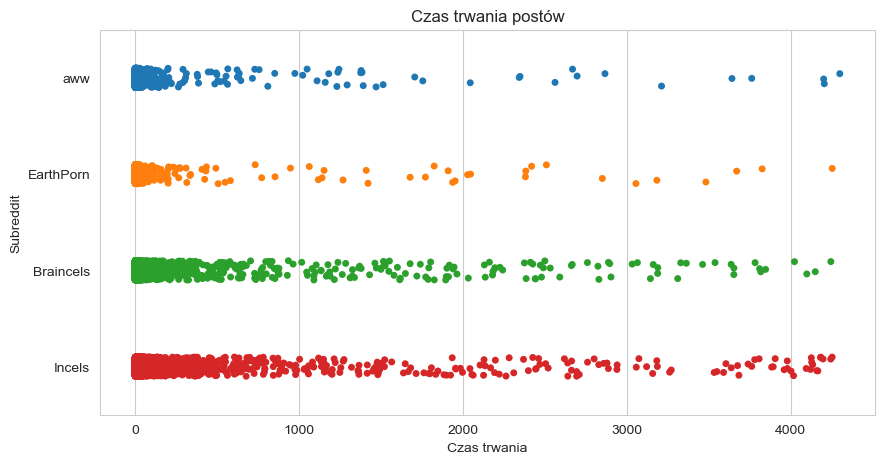

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
data = pd.concat((aww[~aww['post_duration'].isin([0,-1])],earthporn[~earthporn['post_duration'].isin([0,-1])],
                  braincels[~braincels['post_duration'].isin([0,-1])],incels[~incels['post_duration'].isin([0,-1])]))
sns.stripplot(data=data, x="post_duration", y="subreddit",ax=ax).set(title='Czas trwania postów')
ax.set(xlabel='Czas trwania', ylabel='Subreddit')
plt.show()

### Analiza sentymentu

In [12]:
def count_sentiment(df,df_name,column):
    neutral = 0
    surprise = 0
    disqust = 0
    anger = 0
    joy = 0
    fear = 0
    sadness = 0
    no_sentiment = 0
    for row in df[column]:
        if 'neutral' in row:
            neutral+=1
        if 'surprise' in row:
            surprise+=1
        if 'disqust' in row:
            disqust+=1
        if 'anger' in row:
            anger+=1
        if 'joy' in row:
            joy+=1
        if 'fear' in row:
            fear+=1
        if 'sadness' in row:
            sadness+=1
        if row == 'no_sentiment':
            no_sentiment+=1
    return pd.DataFrame({'subreddit': df_name, 
                                    'Neutralny':neutral,
                                    'Zaskoczenie':surprise, 
                                    'Niesmak':disqust, 
                                    'Złość':anger, 
                                    'Radość':joy,
                                    'Strach':fear,
                                    'Smutek':sadness,
                                    'Brak sentymentu':no_sentiment},index=[0])

aww_sentiment_title = count_sentiment(aww,'aww','sentiment_title')
earthporn_sentiment_title = count_sentiment(earthporn,'earthporn','sentiment_title')
braincels_sentiment_title = count_sentiment(braincels,'braincels','sentiment_title')
incels_sentiment_title = count_sentiment(incels,'incels','sentiment_title')

sentiment_title = pd.concat((aww_sentiment_title, earthporn_sentiment_title, braincels_sentiment_title,incels_sentiment_title))

sentiment_title = sentiment_title.melt(id_vars=["subreddit"], 
        var_name="sentiment", 
        value_name="Count")


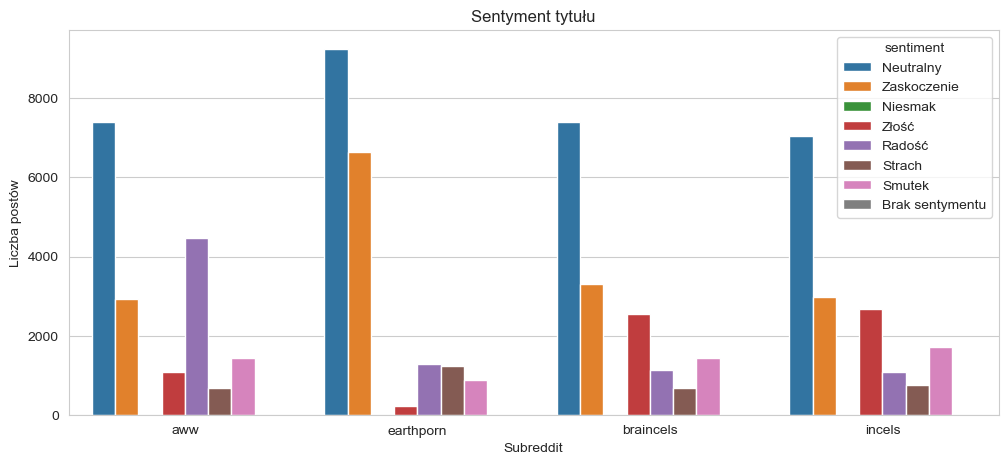

In [13]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(data=sentiment_title, x="subreddit", y="Count", hue="sentiment").set(title='Sentyment tytułu')
ax.set(xlabel='Subreddit', ylabel='Liczba postów')
plt.show()



In [14]:
aww_sentiment_post = count_sentiment(aww,'aww','sentiment_post')
earthporn_sentiment_post = count_sentiment(earthporn,'earthporn','sentiment_post')
braincels_sentiment_post = count_sentiment(braincels,'braincels','sentiment_post')
incels_sentiment_post = count_sentiment(incels,'incels','sentiment_post')

sentiment_post = pd.concat((aww_sentiment_post, earthporn_sentiment_post, braincels_sentiment_post,incels_sentiment_post))

sentiment_post = sentiment_post.melt(id_vars=["subreddit"], 
        var_name="sentiment", 
        value_name="Count")

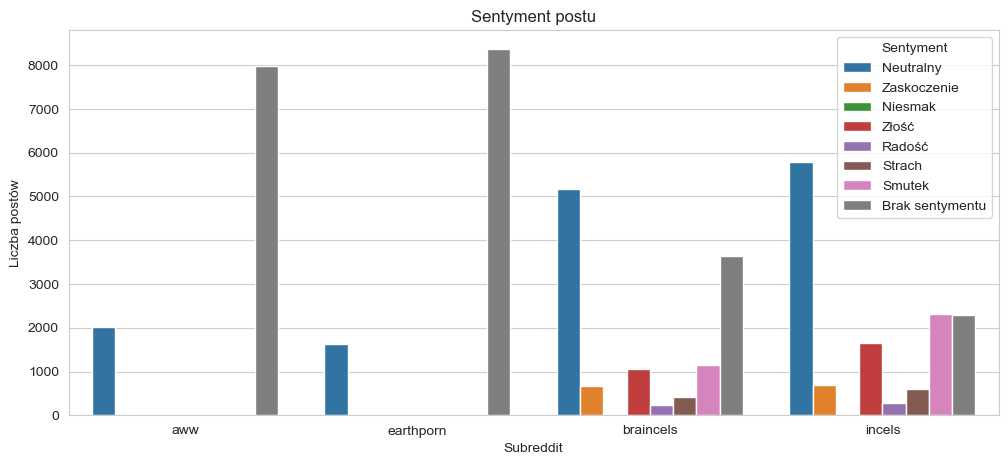

In [15]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(data=sentiment_post, x="subreddit", y="Count", hue="sentiment").set(title='Sentyment postu')
ax.set(xlabel='Subreddit', ylabel='Liczba postów')
plt.legend(title='Sentyment')
plt.show()

### Liczba kontrowersyjnych

In [24]:
print('Aww')
print(f"Liczba kontrowersyjnych komentarzy: {int(aww['no_controversial'].sum())}")
print(f"Procent kontrowersyjnych komentarzy: {int(aww['no_controversial'].sum()/aww['no_comments'].sum()*100)}%")
print('-----------------------------------------------------')
print('Earthporn')
print(f"Liczba kontrowersyjnych komentarzy: {int(earthporn['no_controversial'].sum())}")
print(f"Procent kontrowersyjnych komentarzy: {int(earthporn['no_controversial'].sum()/earthporn['no_comments'].sum()*100)}%")
print('-----------------------------------------------------')
print('Braincels')
print(f"Liczba kontrowersyjnych komentarzy: {int(braincels['no_controversial'].sum())}")
print(f"Procent kontrowersyjnych komentarzy: {int(braincels['no_controversial'].sum()/braincels['no_comments'].sum()*100)}%")
print('-----------------------------------------------------')
print('Incels')
print(f"Liczba kontrowersyjnych komentarzy: {int(incels['no_controversial'].sum())}")
print(f"Procent kontrowersyjnych komentarzy: {int(incels['no_controversial'].sum()/incels['no_comments'].sum()*100)}%")

Aww
Liczba kontrowersyjnych komentarzy: 1219
Procent kontrowersyjnych komentarzy: 2%
-----------------------------------------------------
Earthporn
Liczba kontrowersyjnych komentarzy: 224
Procent kontrowersyjnych komentarzy: 1%
-----------------------------------------------------
Braincels
Liczba kontrowersyjnych komentarzy: 3917
Procent kontrowersyjnych komentarzy: 2%
-----------------------------------------------------
Incels
Liczba kontrowersyjnych komentarzy: 6275
Procent kontrowersyjnych komentarzy: 3%


### Macierz korelacji

In [40]:
df

,score,wiener_index,depth,no_comments,post_duration,no_controversial,controversial
0,37.0,0.00000,2,1,0.000000,0.0,0
1,11.0,1.00000,2,7,7.138333,0.0,0
2,22.0,1.00000,2,2,0.316111,0.0,0
3,3.0,0.00000,2,1,0.000000,0.0,0
4,36.0,0.00000,2,1,0.000000,0.0,0
...,...,...,...,...,...,...,...
39995,1.0,0.00000,0,0,-1.000000,0.0,1
39996,0.0,1.30000,6,9,4.211944,0.0,1
39997,38.0,1.12381,14,30,7.885000,0.0,1
39998,1.0,0.00000,0,0,-1.000000,0.0,1


In [39]:
df = pd.concat((aww,earthporn,braincels,incels)).reset_index()
df['controversial'] = df.apply(lambda x: 1 if (x['subreddit'] in ['Braincels','Incels']) else 0, axis=1)
df = df.drop(['index','subreddit','author','url','title','selftext','id','sentiment_post','sentiment_title'],axis=1)

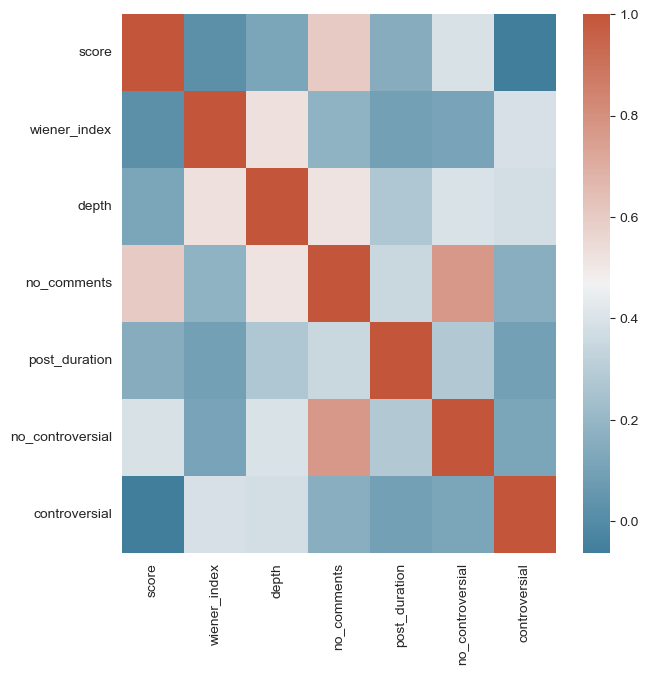

In [47]:
corr = df.corr()
f, ax = plt.subplots(figsize=(7, 7))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,cmap=cmap)
plt.show()

### Unikatowi użytkownicy

In [58]:
print('Aww')
print(f"Liczba unikatowych użytkowników: {len(aww['author'].unique())}")
print(f"Liczba zbanowanych użytkowników: {len(aww[aww['author']=='[deleted]'])}")
print('-----------------------------------------------------')
print('Earthporn')
print(f"Liczba unikatowych użytkowników: {len(earthporn['author'].unique())}")
print(f"Liczba zbanowanych użytkowników: {len(earthporn[earthporn['author']=='[deleted]'])}")
print('-----------------------------------------------------')
print('Braincels')
print(f"Liczba unikatowych użytkowników: {len(braincels['author'].unique())}")
print(f"Liczba zbanowanych użytkowników: {len(braincels[braincels['author']=='[deleted]'])}")
print('-----------------------------------------------------')
print('Incels')
print(f"Liczba unikatowych użytkowników: {len(incels['author'].unique())}")
print(f"Liczba zbanowanych użytkowników: {len(incels[incels['author']=='[deleted]'])}")

Aww
Liczba unikatowych użytkowników: 7552
Liczba zbanowanych użytkowników: 2068
-----------------------------------------------------
Earthporn
Liczba unikatowych użytkowników: 6073
Liczba zbanowanych użytkowników: 3177
-----------------------------------------------------
Braincels
Liczba unikatowych użytkowników: 3073
Liczba zbanowanych użytkowników: 3745
-----------------------------------------------------
Incels
Liczba unikatowych użytkowników: 2512
Liczba zbanowanych użytkowników: 3218
